# Confusion Matrices


### Ploting

In [0]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

from collections import OrderedDict
import sklearn as sk
from sklearn.metrics import confusion_matrix

In [0]:
class confusionMatrix:
  
    def __init__(self, real, predicted, labels):
        
        self.real = real
        self.predicted = predicted
        self.labels = labels # = k
        self.mainArray = confusion_matrix(self.real, self.predicted, self.labels)
        
        confusionMatrix.calcParameters(self)
        
        confusionMatrix.accCalc(self)
    
    def calcParameters(self):
        
        self.hits = 0
        self.n = 0
        for i in range(0, len(self.mainArray)):
            self.hits += self.mainArray[i,i]
            for j in range(0, len(self.mainArray)):
                self.n += self.mainArray[i,j]
                
    def accCalc(self):
        self.accuracy = self.hits/self.n
        self.error = 1 - self.accuracy
        
    def log(self):
        print('----------LOG----------')
        print('real      : ', self.real)
        print('predicted : ', self.predicted)
        print('labels    : ', self.labels)
        print('--Confusion matrix--')
        print(self.mainArray)
        print('accuracy  : ', self.accuracy)
        print('error     : ', self.error)
        confusionMatrix.draw(self)
        
    def draw(self,normalize = False):
      
      def plot(cm,
               target_names,
               title='Confusion matrix',
               cmap=None,
               normalize=normalize):
      
        import itertools
        if cmap is None:
            cmap = plt.get_cmap('Oranges')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
      
      plot(self.mainArray, self.labels)
     

----------LOG----------
real      :  [1, 2, 4, 3, 3, 3, 4, 0, 1, 2, 4, 3, 1, 4, 2, 2, 3, 0, 0, 0, 4, 4, 2, 4, 2, 4, 1, 3]
predicted :  [0, 1, 3, 4, 0, 2, 3, 4, 2, 2, 3, 4, 1, 3, 2, 4, 2, 3, 0, 1, 1, 2, 3, 4, 4, 2, 0, 3]
labels    :  [0, 1, 2, 3, 4]
--Confusion matrix--
[[1 1 0 1 1]
 [2 1 1 0 0]
 [0 1 2 1 2]
 [1 0 2 1 2]
 [0 1 2 4 1]]
accuracy  :  0.21428571428571427
error     :  0.7857142857142857


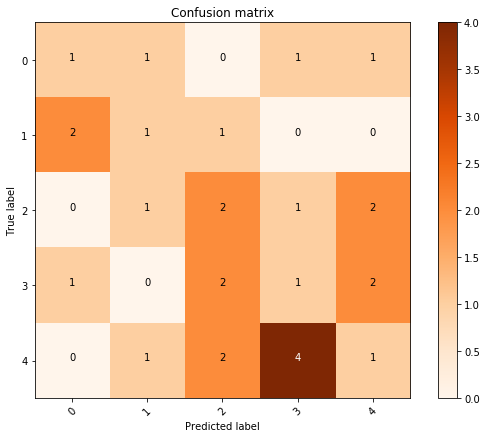

In [3]:
ccc = confusionMatrix([1,2,4,3,3,3,4,0,1,2,4,3,1,4,2,2,3,0,0,0,4,4,2,4,2,4,1,3],
                      [0,1,3,4,0,2,3,4,2,2,3,4,1,3,2,4,2,3,0,1,1,2,3,4,4,2,0,3],
                      [0,1,2,3,4])
ccc.log()


### Binary evaluation

In [0]:
class binaryConfusionMatrix(confusionMatrix):

  def __init__(self, real, predicted, labels = [1,0]):
    self.real = real
    self.predicted = predicted
    self.labels = labels
    if len(labels)!=2 : print('wrong dimensions')
    self.mainArray = confusion_matrix(self.real, self.predicted, self.labels)
    
    binaryConfusionMatrix.calcParameters(self)
    binaryConfusionMatrix.accCalc(self)
    binaryConfusionMatrix.calcBinaryParameters(self)
    
  def calcBinaryParameters(self, beta = 1):

    self.TP = self.mainArray[0][0]
    self.FP = self.mainArray[1][0]
    self.FN = self.mainArray[0][1]
    self.TN = self.mainArray[1][1]
    self.P = self.TP + self.FN
    self.N = self.TN + self.FP
    self.precision = self.TP/(self.TP + self.FP)
    self.recall = self.TP/self.P
    self.specificity = self.TN/self.N
    
    self.Fscore = ((1+(beta**2)) * self.precision*self.recall)/((beta**2) * self.precision + self.recall)
    # '=' (1+B²)TP/((1+B²)TP+FP+B²FN)  # if B == 1 : F_B = F_Beta = F_1
    self.MCC = (self.TP*self.TN-self.FP*self.FN)/\
    np.sqrt((self.TP+self.FP)*(self.TP+self.FN)*(self.TN+self.FP)*(self.TN+self.FN))
    
  def log(self):
    confusionMatrix(self.real, self.predicted, self.labels).log()
    print('--Binary Log--')
    print('TP = ', self.TP)
    print('FP = ', self.FP)
    print('FN = ', self.FN)
    print('TN = ', self.TN)
    print('precision = ', self.precision)
    print('TPR = recall = sensitivity =  ', self.recall)
    print('TNR = specificity = ', self.specificity)
    print('F-score = ', self.Fscore)
    print('MCC = phi = ', self.MCC)
    

----------LOG----------
real      :  [1, 1, 0, 0, 1, 1]
predicted :  [0, 1, 0, 0, 0, 0]
labels    :  [1, 0]
--Confusion matrix--
[[1 3]
 [0 2]]
accuracy  :  0.5
error     :  0.5


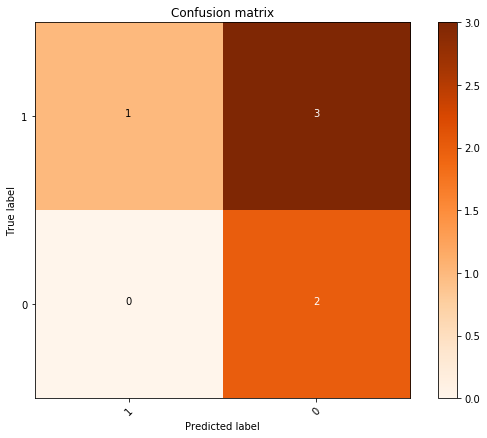

--Binary Log--
TP =  1
FP =  0
FN =  3
TN =  2
precision =  1.0
TPR = recall = sensitivity =   0.25
TNR = specificity =  1.0
F-score =  0.4
MCC = phi =  0.31622776601683794


In [36]:
test = binaryConfusionMatrix([1,1,0,0,1,1],[0,1,0,0,0,0])
test.log()